# How to Use "Cats" dataset with Python Reduct SDK

The [ReductStore Project](https://www.reduct.store) hosts the free "cats" dataset, which contains about 10K photos of cats in JPEG format with eye coordinates, a month, and ears as labels.
In this example, we can learn how to download the dataset from the [ReductStore](https://play.reduct.store) instance and draw the features using the OpenCV library.

## Installing Dependencies

First, we need to install the [ReductStore Client SDK for Python](https://github.com/reductstore/reduct-py) to download the photos and labels.  We also need  the OpenCV Python library for drawing features and Pillow to display images in the Jupyter environment:

In [ ]:
!pip install reduct-py opencv-python Pillow

## Getting Data

To retrieve data we need the URL of the ReductStore instance, the bucket name, where we store our datasets and an API token with read access, so that we can connect to the database by using the `Client` class:

In [2]:
from reduct import Client, Bucket

HOST="https://play.reduct.store"
API_TOKEN="dataset-read-eab13e4f5f2df1e64363806443eea7ba83406ce701d49378d2f54cfbf02850f5"
BUCKET = "datasets"

client = Client(HOST, api_token=API_TOKEN)

bucket: Bucket = await client.get_bucket(BUCKET)

Now, we can query the photos with annotations and draw the features:

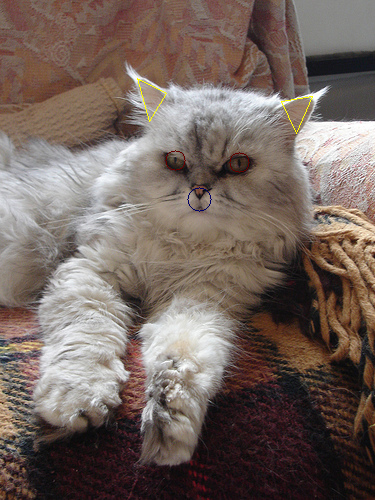

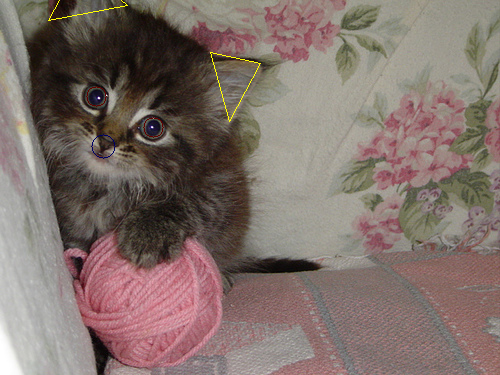

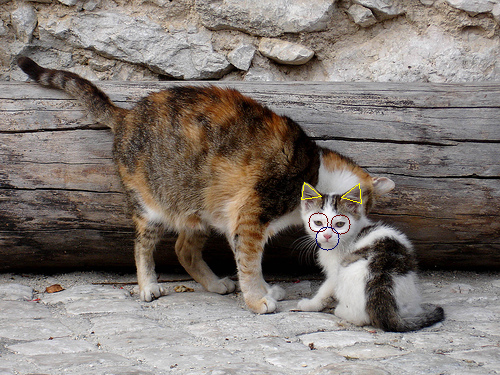

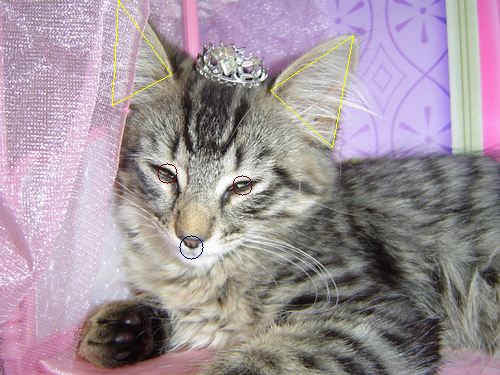

In [3]:
from PIL import Image
import numpy as np
import cv2
from IPython.display import display

DATASET="cats"

# Let's query first 4 photo
async for record in bucket.query(DATASET, start=0, stop=5):
  annotation = record.labels
  # Decode JPEG
  image_np = np.frombuffer(await record.read_all(), np.uint8)
  img = cv2.imdecode(image_np,  cv2.IMREAD_COLOR)

  # Draw features
  cv2.circle(img, (int(annotation['right-eye-x']), int(annotation['right-eye-y'])), 10, (0,0,100), 1)
  cv2.circle(img, (int(annotation['left-eye-x']), int(annotation['left-eye-y'])), 10, (0,0,100), 1)
  cv2.circle(img, (int(annotation['mouth-x']), int(annotation['mouth-y'])), 12, (100,0,0), 1)

  pts = np.array([[annotation[f'right-ear-{i}-x'], annotation[f'right-ear-{i}-y']] for i in range(1,4) ], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(img,[pts],True,(0,255,255))

  pts = np.array([[annotation[f'left-ear-{i}-x'], annotation[f'left-ear-{i}-y']] for i in range(1,4) ], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(img,[pts],True,(0,255,255))

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

  # Show result
  display(Image.fromarray(img))

Now, we can query the photos with annotations and draw the features:This is a trivial example, but you can use this dataset for more sophisticated AI algorithms or image processing. If the interaction over the Internet is too slow for your purposes, you can export the dataset to a file system. Alternatively, you can spin up your own ReductStore instance locally and copy the dataset to it. See the [Reduct CLI](https://cli.reduct.store/en/latest/docs/export/) for more information.
